In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)



## Data Loading and Initial Inspection

We'll load the dataset and take our first look at its structure, content, and overall health.


In [3]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')

titanic_df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
print(f"Dataset shape: {titanic_df.shape}")
print(f"Number of rows: {titanic_df.shape[0]}")
print(f"Number of columns: {titanic_df.shape[1]}")


Dataset shape: (891, 12)
Number of rows: 891
Number of columns: 12


In [5]:
print("Dataset Information:")
titanic_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print("Column names and data types:")
print(titanic_df.dtypes)
print("\nColumn names:")
print(titanic_df.columns.tolist())


Column names and data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Column names:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
print("Statistical Summary of Numerical Columns:")
titanic_df.describe()


Statistical Summary of Numerical Columns:


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
print("Statistical Summary of Categorical Columns:")
titanic_df.describe(include=['object'])


Statistical Summary of Categorical Columns:


Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

## Step 3: Missing Values Analysis

Let's analyze missing values in our dataset to understand data quality issues.


In [9]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 50)
missing_values = titanic_df.isnull().sum()
missing_percentage = (missing_values / len(titanic_df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)


Missing Values Analysis:
      Column  Missing Count  Missing Percentage
10     Cabin            687           77.104377
5        Age            177           19.865320
11  Embarked              2            0.224467


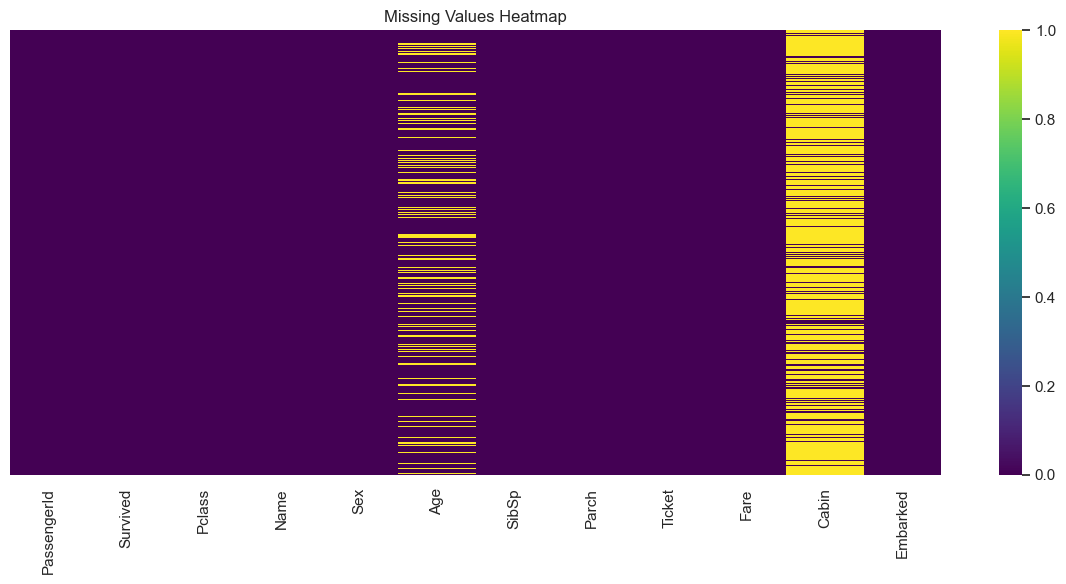

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()


In [11]:
# Handle missing values
print("Handling Missing Values:")
print("=" * 30)

# Fill missing Age with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
print("Filled missing Age values with median")

# Fill missing Embarked with mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
print("Filled missing Embarked values with mode")

# Cabin has too many missing values, we'll create a new feature
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int)
print("Created Has_Cabin feature (1 if cabin exists, 0 otherwise)")

# Drop Cabin column as it has too many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)
print("✓ Dropped Cabin column due to high missing values")

print(f"\nRemaining missing values: {titanic_df.isnull().sum().sum()}")


Handling Missing Values:
Filled missing Age values with median
Filled missing Embarked values with mode
Created Has_Cabin feature (1 if cabin exists, 0 otherwise)
✓ Dropped Cabin column due to high missing values

Remaining missing values: 0


 Univariate Analysis



Overall Survival Rate: 38.38%
Total Passengers: 891
Survived: 342
Did not survive: 549


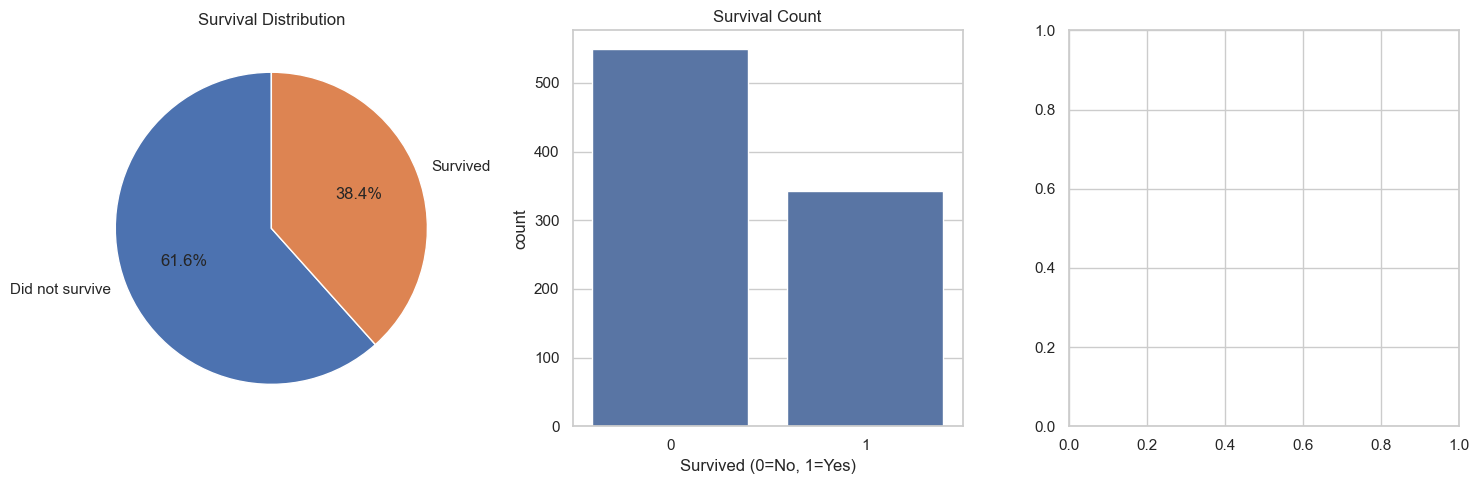

In [12]:
# Target Variable Analysis - Survival
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
survival_counts = titanic_df['Survived'].value_counts()
plt.pie(survival_counts.values, labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=titanic_df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0=No, 1=Yes)')

plt.subplot(1, 3, 3)
survival_rate = titanic_df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")
print(f"Total Passengers: {len(titanic_df)}")
print(f"Survived: {titanic_df['Survived'].sum()}")
print(f"Did not survive: {len(titanic_df) - titanic_df['Survived'].sum()}")

plt.tight_layout()
plt.show()


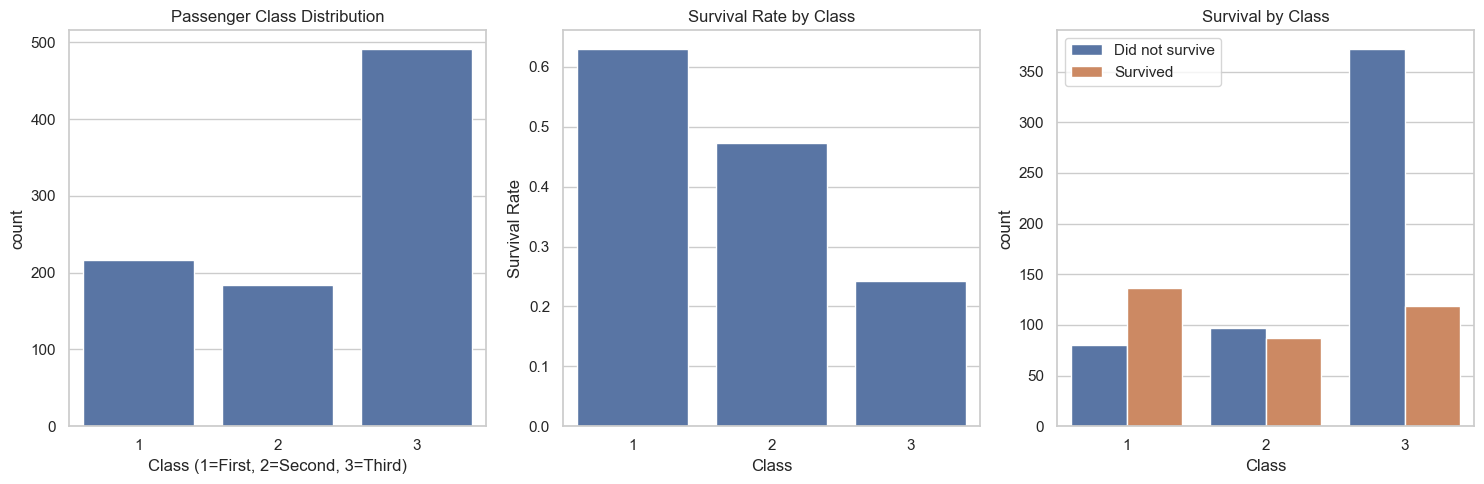

Survival rates by class:
Class 1: 62.96%
Class 2: 47.28%
Class 3: 24.24%


In [13]:
# Passenger Class Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=titanic_df, x='Pclass')
plt.title('Passenger Class Distribution')
plt.xlabel('Class (1=First, 2=Second, 3=Third)')

plt.subplot(1, 3, 2)
class_survival = titanic_df.groupby('Pclass')['Survived'].mean()
sns.barplot(x=class_survival.index, y=class_survival.values)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 3)
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.title('Survival by Class')
plt.xlabel('Class')
plt.legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

print("Survival rates by class:")
for pclass in sorted(titanic_df['Pclass'].unique()):
    rate = titanic_df[titanic_df['Pclass'] == pclass]['Survived'].mean()
    print(f"Class {pclass}: {rate:.2%}")


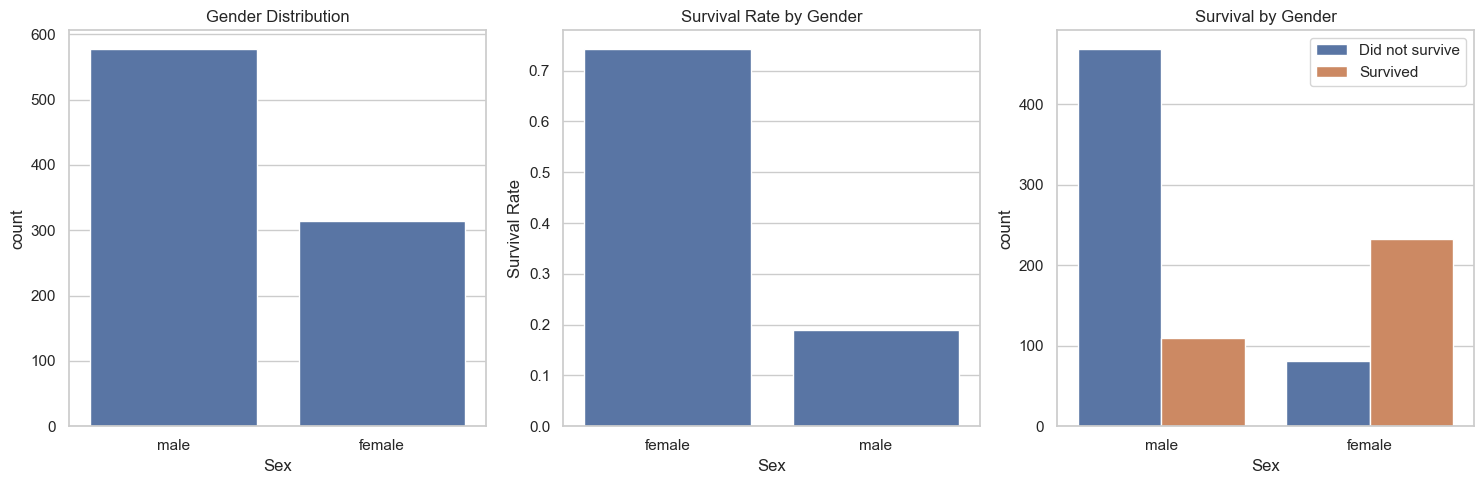

Survival rates by gender:
male: 18.89%
female: 74.20%


In [14]:
# Gender Analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=titanic_df, x='Sex')
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
gender_survival = titanic_df.groupby('Sex')['Survived'].mean()
sns.barplot(x=gender_survival.index, y=gender_survival.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 3)
sns.countplot(data=titanic_df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

print("Survival rates by gender:")
for sex in titanic_df['Sex'].unique():
    rate = titanic_df[titanic_df['Sex'] == sex]['Survived'].mean()
    print(f"{sex}: {rate:.2%}")


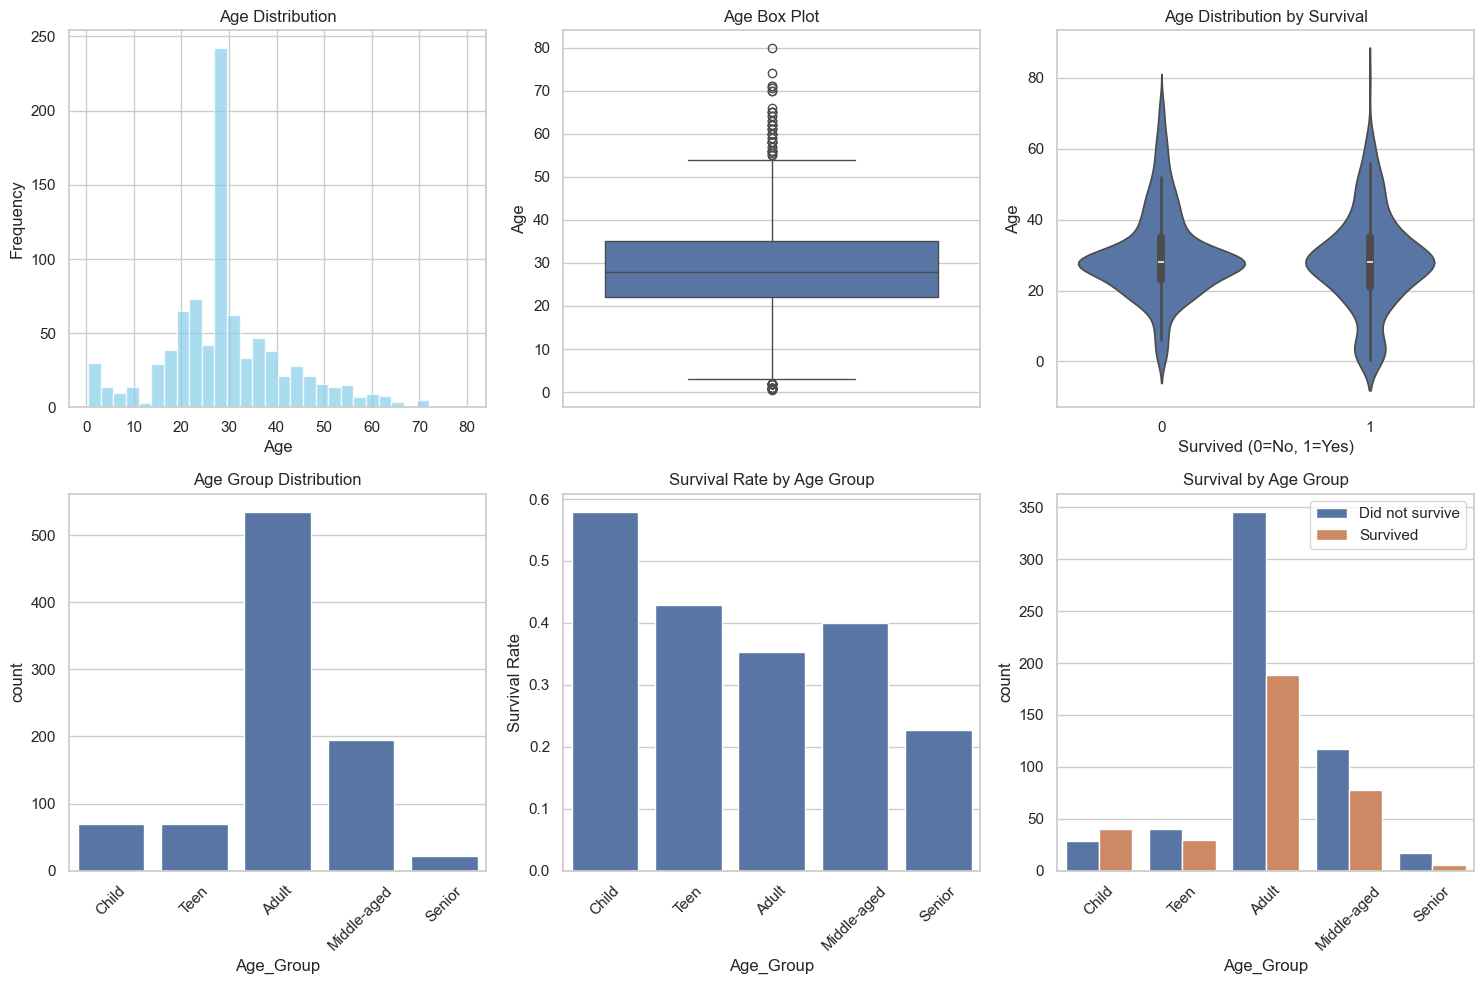

Age Statistics:
Mean Age: 29.4
Median Age: 28.0
Min Age: 0.4
Max Age: 80.0

Survival rates by age group:
Adult: 35.33%
Middle-aged: 40.00%
Child: 57.97%
Teen: 42.86%
Senior: 22.73%


In [15]:
# Age Analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(titanic_df['Age'], bins=30, alpha=0.7, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.boxplot(y=titanic_df['Age'])
plt.title('Age Box Plot')

plt.subplot(2, 3, 3)
sns.violinplot(data=titanic_df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0=No, 1=Yes)')

plt.subplot(2, 3, 4)
# Age groups
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                                labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
sns.countplot(data=titanic_df, x='Age_Group')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
age_survival = titanic_df.groupby('Age_Group')['Survived'].mean()
sns.barplot(x=age_survival.index, y=age_survival.values)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.countplot(data=titanic_df, x='Age_Group', hue='Survived')
plt.title('Survival by Age Group')
plt.legend(['Did not survive', 'Survived'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Age Statistics:")
print(f"Mean Age: {titanic_df['Age'].mean():.1f}")
print(f"Median Age: {titanic_df['Age'].median():.1f}")
print(f"Min Age: {titanic_df['Age'].min():.1f}")
print(f"Max Age: {titanic_df['Age'].max():.1f}")

print("\nSurvival rates by age group:")
for age_group in titanic_df['Age_Group'].unique():
    if pd.notna(age_group):
        rate = titanic_df[titanic_df['Age_Group'] == age_group]['Survived'].mean()
        print(f"{age_group}: {rate:.2%}")


 Feature Engineering


In [16]:
# Extract Title from Name
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss', 
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Don': 'Rare',
    'Rev': 'Rare',
    'Dr': 'Rare',
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Major': 'Rare',
    'Lady': 'Rare',
    'Sir': 'Rare',
    'Mlle': 'Miss',
    'Col': 'Rare',
    'Capt': 'Rare',
    'Countess': 'Rare',
    'Jonkheer': 'Rare'
}

titanic_df['Title'] = titanic_df['Title'].map(title_mapping)
titanic_df['Title'].fillna('Rare', inplace=True)

print("Title distribution:")
print(titanic_df['Title'].value_counts())


Title distribution:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [17]:
# Family Size Feature
titanic_df['Family_Size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Family Size Categories
titanic_df['Family_Size_Category'] = pd.cut(titanic_df['Family_Size'], 
                                           bins=[0, 1, 4, 11], 
                                           labels=['Alone', 'Small', 'Large'])

print("Family Size distribution:")
print(titanic_df['Family_Size_Category'].value_counts())


Family Size distribution:
Family_Size_Category
Alone    537
Small    292
Large     62
Name: count, dtype: int64


 ## Bivariate Analysis



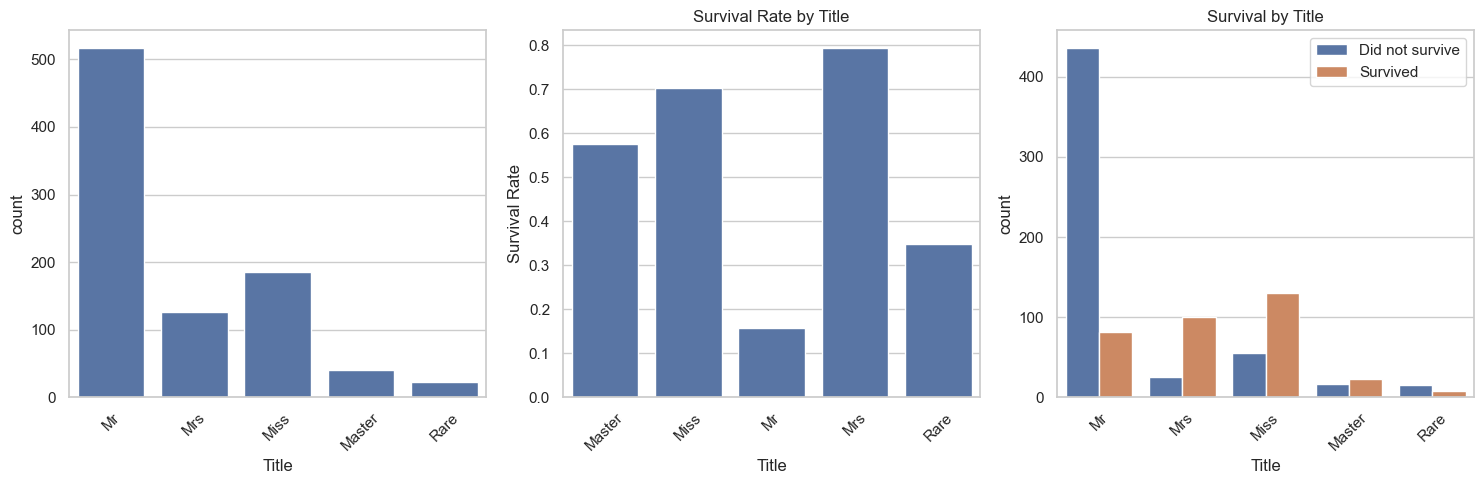

Survival rates by title:
Mr: 15.67%
Mrs: 79.37%
Miss: 70.27%
Master: 57.50%
Rare: 34.78%


In [18]:
# Title vs Survival
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=titanic_df, x='Title')

plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
title_survival = titanic_df.groupby('Title')['Survived'].mean()
sns.barplot(x=title_survival.index, y=title_survival.values)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.countplot(data=titanic_df, x='Title', hue='Survived')
plt.title('Survival by Title')
plt.legend(['Did not survive', 'Survived'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Survival rates by title:")
for title in titanic_df['Title'].unique():
    rate = titanic_df[titanic_df['Title'] == title]['Survived'].mean()
    print(f"{title}: {rate:.2%}")


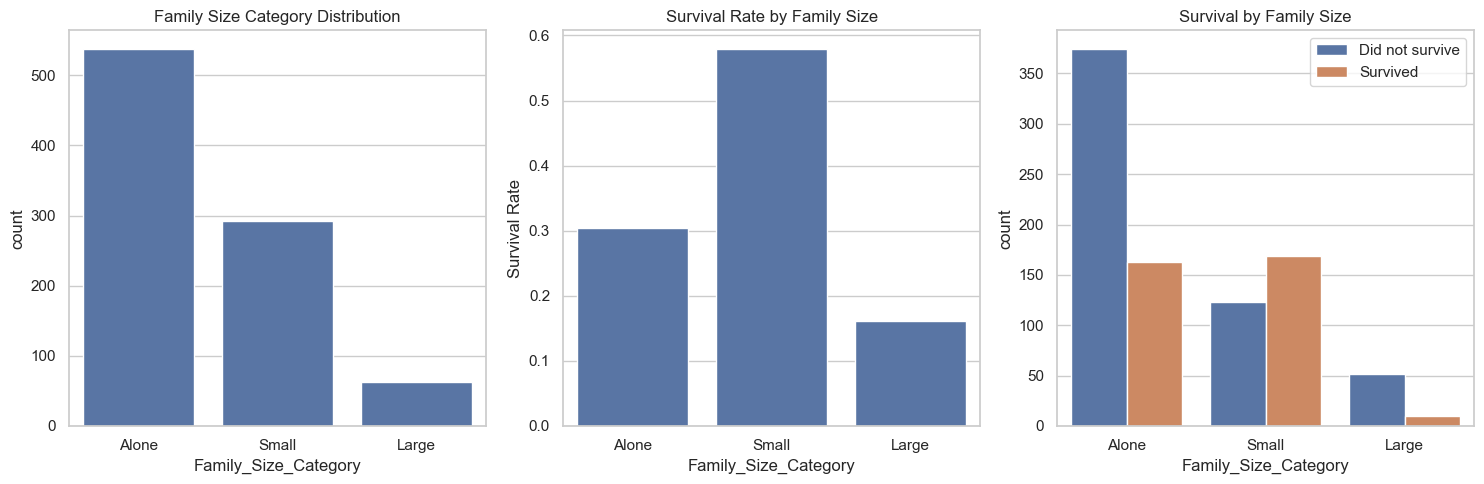

Survival rates by family size category:
Small: 57.88%
Alone: 30.35%
Large: 16.13%


In [19]:
# Family Size vs Survival
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=titanic_df, x='Family_Size_Category')
plt.title('Family Size Category Distribution')

plt.subplot(1, 3, 2)
family_survival = titanic_df.groupby('Family_Size_Category')['Survived'].mean()
sns.barplot(x=family_survival.index, y=family_survival.values)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 3)
sns.countplot(data=titanic_df, x='Family_Size_Category', hue='Survived')
plt.title('Survival by Family Size')
plt.legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

print("Survival rates by family size category:")
for category in titanic_df['Family_Size_Category'].unique():
    if pd.notna(category):
        rate = titanic_df[titanic_df['Family_Size_Category'] == category]['Survived'].mean()
        print(f"{category}: {rate:.2%}")


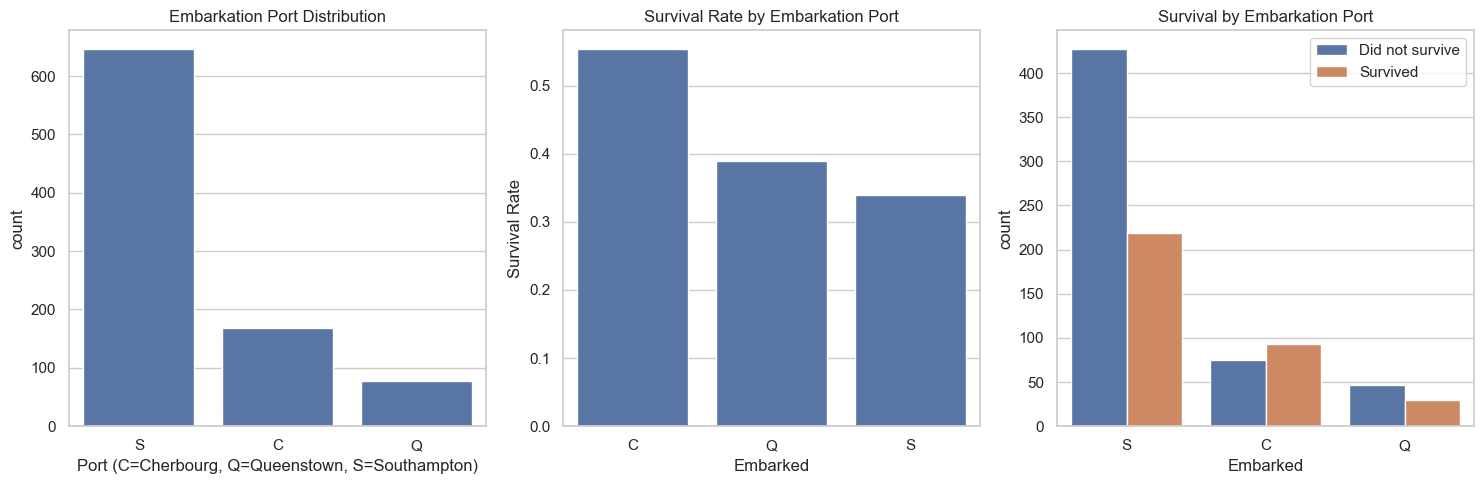

Survival rates by embarkation port:
Southampton (S): 33.90%
Cherbourg (C): 55.36%
Queenstown (Q): 38.96%


In [20]:
# Embarked vs Survival
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=titanic_df, x='Embarked')
plt.title('Embarkation Port Distribution')
plt.xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')

plt.subplot(1, 3, 2)
embarked_survival = titanic_df.groupby('Embarked')['Survived'].mean()
sns.barplot(x=embarked_survival.index, y=embarked_survival.values)
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 3)
sns.countplot(data=titanic_df, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Port')
plt.legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

print("Survival rates by embarkation port:")
for port in titanic_df['Embarked'].unique():
    rate = titanic_df[titanic_df['Embarked'] == port]['Survived'].mean()
    port_name = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}.get(port, port)
    print(f"{port_name} ({port}): {rate:.2%}")


## Multivariate Analysis


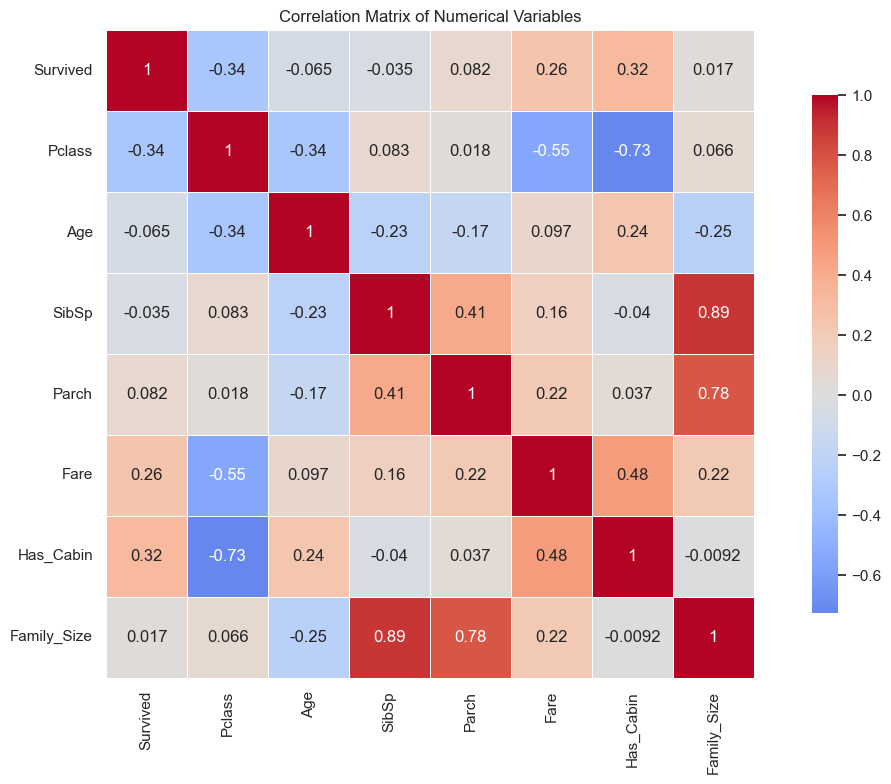

Correlation with Survival:
Survived       1.000000
Has_Cabin      0.316912
Fare           0.257307
Parch          0.081629
Family_Size    0.016639
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


In [21]:
# Correlation Analysis
plt.figure(figsize=(12, 8))

# Select numerical columns for correlation
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin', 'Family_Size']
correlation_matrix = titanic_df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

print("Correlation with Survival:")
survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print(survival_corr)


In [22]:
# Cross-tabulation analysis
print("Cross-tabulation: Class vs Gender vs Survival")
crosstab = pd.crosstab([titanic_df['Pclass'], titanic_df['Sex']], titanic_df['Survived'], margins=True)
print(crosstab)

print("\nSurvival rates by Class and Gender:")
for pclass in sorted(titanic_df['Pclass'].unique()):
    for sex in titanic_df['Sex'].unique():
        subset = titanic_df[(titanic_df['Pclass'] == pclass) & (titanic_df['Sex'] == sex)]
        if len(subset) > 0:
            rate = subset['Survived'].mean()
            print(f"Class {pclass} {sex}: {rate:.2%} ({len(subset)} passengers)")


Cross-tabulation: Class vs Gender vs Survival
Survived         0    1  All
Pclass Sex                  
1      female    3   91   94
       male     77   45  122
2      female    6   70   76
       male     91   17  108
3      female   72   72  144
       male    300   47  347
All            549  342  891

Survival rates by Class and Gender:
Class 1 male: 36.89% (122 passengers)
Class 1 female: 96.81% (94 passengers)
Class 2 male: 15.74% (108 passengers)
Class 2 female: 92.11% (76 passengers)
Class 3 male: 13.54% (347 passengers)
Class 3 female: 50.00% (144 passengers)


Key Insights from the Analysis

1. Most Important Factors Affecting Survival:

Gender: Women had a clear advantage, with a survival rate of 74.2% compared to just 18.9% for men.

Passenger Class: First-class passengers fared best (63% survival), followed by second class (47.3%), and third class had the lowest survival (24.2%).

Title: Titles were telling—women labeled as ‘Mrs’ or ‘Miss’ survived at much higher rates, while ‘Mr’ had notably lower survival.

Age: Children had a better chance of surviving than adults, highlighting the "women and children first" effect.

2. Other Factors That Influenced Survival:

Family Size: Travelers in small families (2–4 members) had higher survival chances compared to those alone or in very large families.

Cabin: Having a cabin, which hints at wealth, was associated with higher survival.

Port of Embarkation: Passengers boarding from Cherbourg tended to survive more often than others.

3. Data Quality Notes:

Age: 177 values were missing and replaced with the median.

Cabin: 687 missing entries were simplified into a new binary feature called Has_Cabin.

Embarked: Only 2 missing values, filled using the most common port.

4. Feature Engineering Highlights:

Title: Extracted from names; provided more predictive power than gender alone.

Family Features: Created Family_Size and Family_Size_Category to capture group effects.

Age Grouping: Generated Age_Group for clearer insights into age patterns.

Cabin Indicator: Introduced Has_Cabin as a simple yes/no feature.

 YData Profiling Report



In [23]:
# Generate ydata-profiling report
print("Generating ydata-profiling report...")
print("This may take a few moments...")

# Create profile report
profile = ProfileReport(titanic_df, 
                       title="Titanic Dataset - Post-EDA Profiling Report",
                       explorative=True,
                       minimal=False)

# Display the report in the notebook
profile.to_notebook_iframe()


Generating ydata-profiling report...
This may take a few moments...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 60.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
# Save the profile report as HTML file
print("Saving profile report as HTML file...")
profile.to_file("titanic_post_eda_profile_report.html")
print("✓ Profile report saved as 'titanic_post_eda_profile_report.html'")

# Also save as JSON for programmatic access
profile.to_file("titanic_post_eda_profile_report.json")
print("✓ Profile report saved as 'titanic_post_eda_profile_report.json'")


Saving profile report as HTML file...


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✓ Profile report saved as 'titanic_post_eda_profile_report.html'


Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✓ Profile report saved as 'titanic_post_eda_profile_report.json'


##  Final Dataset Overview



In [25]:
# Final dataset overview
print("Final Dataset Overview:")
print("=" * 50)
print(f"Shape: {titanic_df.shape}")
print(f"Columns: {list(titanic_df.columns)}")
print(f"Data types:\n{titanic_df.dtypes}")
print(f"\nMissing values: {titanic_df.isnull().sum().sum()}")
print(f"Memory usage: {titanic_df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\nFirst few rows of the final dataset:")
titanic_df.head()


Final Dataset Overview:
Shape: (891, 16)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Has_Cabin', 'Age_Group', 'Title', 'Family_Size', 'Family_Size_Category']
Data types:
PassengerId                int64
Survived                   int64
Pclass                     int64
Name                      object
Sex                       object
Age                      float64
SibSp                      int64
Parch                      int64
Ticket                    object
Fare                     float64
Embarked                  object
Has_Cabin                  int32
Age_Group               category
Title                     object
Family_Size                int64
Family_Size_Category    category
dtype: object

Missing values: 0
Memory usage: 346.51 KB

First few rows of the final dataset:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin    Age_Group Title  \
0      0         A/5 21171   7.2500        S          0        Adult    Mr   
1      0          PC 17599  71.2833        C          1  Middle-aged   Mrs   
2      0  STON/O2. 3101282   7.9250        S          0        Adult  Miss   
3      0            113803  53.1000        S          1        Adult   Mrs   
4      0            373450   8.0500        S          0        Adult    Mr   

   Family_Size Family_Size_Category  
0            2                Small  
1            2                Small  
2            1                Alone  
3            2                Small  
4            1                Alone

## Conclusion

This comprehensive EDA has provided deep insights into the Titanic dataset:

1. **Data Quality**: Successfully handled missing values and created meaningful features
2. **Key Predictors**: Identified gender, class, and age as the strongest survival predictors
3. **Feature Engineering**: Created more predictive features like Title and Family_Size
4. **Visualizations**: Generated comprehensive visualizations to understand patterns
5. **Profiling Report**: Created automated profiling report for detailed analysis

The dataset is now ready for machine learning model development, with clean data and engineered features that should improve predictive performance.

**Files Generated:**
- `titanic_post_eda_profile_report.html` - Interactive HTML profiling report
- `titanic_post_eda_profile_report.json` - JSON format for programmatic access
